* Author : Ruchit Vithani
* ID : 201701070
* Date : 09-06-2020
* IT416 Topics in Deep Learning : Lab Assignment 2

# **Task -1  MNIST Dataset**
MNIST dataset can be loaded from keras.datasets, splitting of data is done in order to form the training set and testing set.

For training the model, it is preferred to normalize the data between (0,1) range.

# **Importing MNIST Data**

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models  import Sequential

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

# **Concatenate Training and Testing Data**

In [36]:
data_images=np.concatenate((train_images,test_images))
print(data_images.shape)

data_labels=np.concatenate((train_labels,test_labels))
print(data_labels.shape)

(70000, 28, 28, 1)
(70000,)


Lets visualize some of the images from dataset.

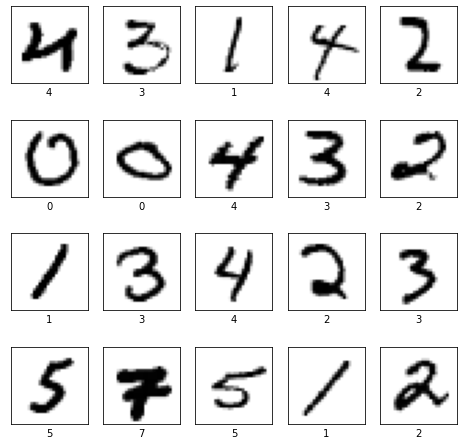

In [37]:
plt.figure(figsize=(8,8))
random_inds = np.random.choice(70000,20)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(data_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(data_labels[image_ind])

# **Flattening Image Vectors to 1D (28X28 -> 784)**

In [38]:
'''
TODO: Flatten each input image to 1D vector
'''

data_images = data_images.reshape(70000, 28*28)
data_images.shape

(70000, 784)

# **Storing the Labels**

In [39]:
'''
Store all the labels
classes - 0 , 1 , .... 8 , 9
'''
class_labels = tf.one_hot(data_labels, 10)
print("Shape of stored labels : ", class_labels.shape, "\n")
print("First 5 labels are : ", data_labels[:5], "\n")
print("Corresponding stored labels in one-hot format are : ", class_labels[:5])

Shape of stored labels :  (70000, 10) 

First 5 labels are :  [5 0 4 1 9] 

Corresponding stored labels in one-hot format are :  tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


# **Initialize Weights and Biases**

In [40]:
#######################################################################################################

'''                                                                        
TODO : Define a function that would initialize weights and biases
'''

#######################################################################################################

"""
__init__ method : In the below class this method initialises the random weights and 
                  biases for the neural network. It takes in shapes and activations 
                  as parameters. 
        
        arguments : shapes, activations.

        shapes : A tensor denoting sizes of various layer. For the 5 layerd neural net, it will
                be 5 element list or tensor, in which, 1st element is the input shape, 2nd, 3rd,
                and 4th elements are sizes of hidden layers and last element is size of output 
                layer. 

                e.g. For the MNIST classification task shapes will be qual to [784, 512, 256, 128, 10]
                if the hidden layers are of sizes 512, 256 and 128 respectively.

        activations : This is list of activation functions at each layer. This will be a list of 
                    size 4, since the input layer do not have any activation. 


forward method : This method runs forward propagation on the provided input

        arguments : input

        returns predicted labels for the input data. If the input data is provided in bathes, 
        it returns labels with shape (batch_size, ) corresponding to each input in batch

"""

#######################################################################################################

class NN():
    def __init__(self, shapes, activations):
        # Weights and biases of 1st hidden layer
        self.W1 = tf.random.normal((shapes[0], shapes[1]), mean=0.0, stddev=1.0)
        self.b1 = tf.random.normal((shapes[1],), mean=0.0, stddev=1.0)

        # Weights and biases of 2nd hidden layer
        self.W2 = tf.random.normal((shapes[1], shapes[2]), mean=0.0, stddev=1.0)
        self.b2 = tf.random.normal((shapes[2],), mean=0.0, stddev=1.0)

        # Weights and biases of 3rd hidden layer
        self.W3 = tf.random.normal((shapes[2], shapes[3]), mean=0.0, stddev=1.0)
        self.b3 = tf.random.normal((shapes[3],), mean=0.0, stddev=1.0)

        # Weights and biases output
        self.W4 = tf.random.normal((shapes[3], shapes[4]), mean=0.0, stddev=1.0)
        self.b4 = tf.random.normal((shapes[4],), mean=0.0, stddev=1.0)

        # List of activation functions to use at each layer
        self.activations = activations

    def forward(self, input):
        # hidden state 1 (corresponding to first hidden layer)
        z1 = tf.matmul(input, self.W1) + self.b1
        h1 = self.activations[0](z1)

        # hidden state 2 (corresponding to second hidden layer)
        z2 = tf.matmul(h1, self.W2) + self.b2
        h2 = self.activations[1](z2)

        # hidden state 3 (corresponding to third hidden layer )
        z3 = tf.matmul(h2, self.W3) + self.b3
        h3 = self.activations[2](z3)

        # Output 
        z4 = tf.matmul(h3, self.W4) + self.b4
        output = self.activations[3](z4)

        predicted_label = tf.argmax(output, 1)
        return predicted_label

# **Accuracy calculation**

In [41]:
'''
TODO : Define a function for calculating accuracy
'''

def cal_accuracy(y_hat, y):
    correct = tf.equal(y_hat, y)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    return accuracy


# **Defiene various activation functions**

In [42]:
def sigmoid(x):
    return 1.0 / (1.0 + tf.exp(-x))

def tanh(x):
    return tf.math.tanh(x)

def relu(x):
    return tf.nn.relu(x)

# **Defining the Model Parameters**

In [43]:
'''
batch_size
hidden_layer1_size
num_epochs
input_size=784
output_size=10

'''
batch_size = 256

input_size = 784
output_size = 10
h1_size = 512
h2_size = 256
h3_size = 128

shapes = [input_size, h1_size, h2_size, h3_size, output_size]
activations = [sigmoid]*4

neural_net = NN(shapes, activations)

#**Method to execute Forward Propagation and calculate accuracy**


# **$Experiments$**

Model configurations : 

* Layer 1 : Input layer : size = 28*28 = 784
* Layer 2 : Hidden layer 1 : size = 512
* Layer 3 : Hidden layer 2 : size = 256
* Layer 4 : Hidden layer 3 : size = 128
* Layer 5 : output layer : size = 10

Activations of all layers are sigmoid in 1st experient


In [44]:
def go_forward(batch_size, idx):
    n = len(data_images)//batch_size 
    batched_data_images = data_images[:n*batch_size].reshape(n, batch_size, 784)
    batched_labels = data_labels[:n*batch_size].reshape(n, batch_size)

    accuracies = []
    for i, batch in enumerate(batched_data_images):
        predictions = neural_net.forward(batch)
        accuracies.append(cal_accuracy(predictions, batched_labels[i]))

    if(n==1):
        plt.subplot(2, 3, idx)
        plt.scatter(np.array([1]), np.array(accuracies))
        plt.xlabel("Batch no.")
        plt.ylabel("Accuracy")
        plt.title("Batch size = " +  str(batch_size))

    else:
        plt.subplot(2, 3, idx)
        plt.plot(accuracies)
        plt.xlabel("Batch no.")
        plt.ylabel("Accuracy")
        plt.title("Batch size = " +  str(batch_size))

    return tf.reduce_mean(accuracies)

# **Sigmoid activations** 
#### (1) Sigmoid activation at all layers. Batch sizes = [128, 256, 512, 1024]

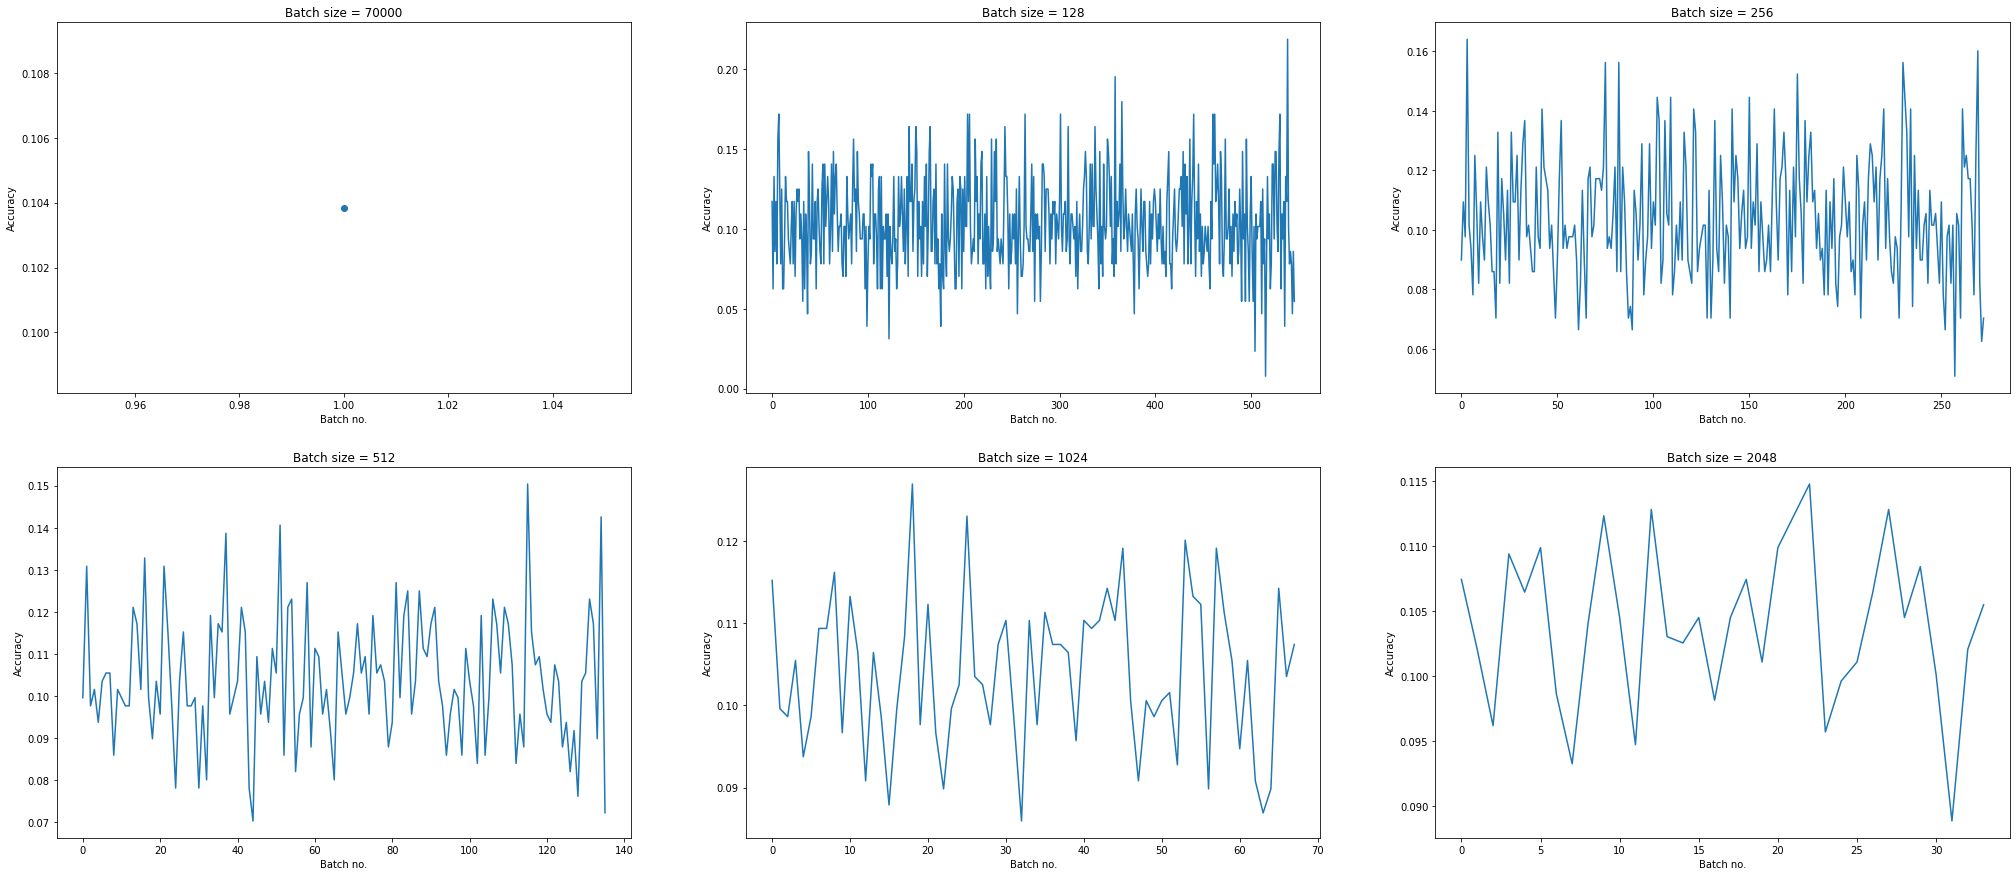

In [45]:
"""
We experiment for 6 different batch sizes : 
(1) 70000 : all points in a single batch
(2) Batch size of 128, 256, 512, 1024
"""
accuracies = {}
batch_sizes = [70000, 128, 256, 512, 1024, 2048]
plt.figure(figsize=(35, 15))
for i,batch_size in enumerate(batch_sizes):
    accuracies[batch_size] = go_forward(batch_size, i+1).numpy()
plt.show()

sigmoid_accuracy = tf.reduce_mean(list(accuracies.values()))

### Print the accuracies obtained for above configuration for various batch sizes :

In [46]:
print("Batch size\tAccuracy\n")
for k, v in accuracies.items():
    print(k,'\t\t',v)

Batch size	Accuracy

70000 		 0.103842854
128 		 0.10383757
256 		 0.10383757
512 		 0.10396082
1024 		 0.10396082
2048 		 0.10396082


# **ReLU activations**  (sigmoid in the output)
In this case, we replaced the activations of hidden layers with ReLU activations. Instead of sigmoids in experiment above

### (2) Let's try using ReLU activation function at hidden layers and sigmoid/tanh at output layer

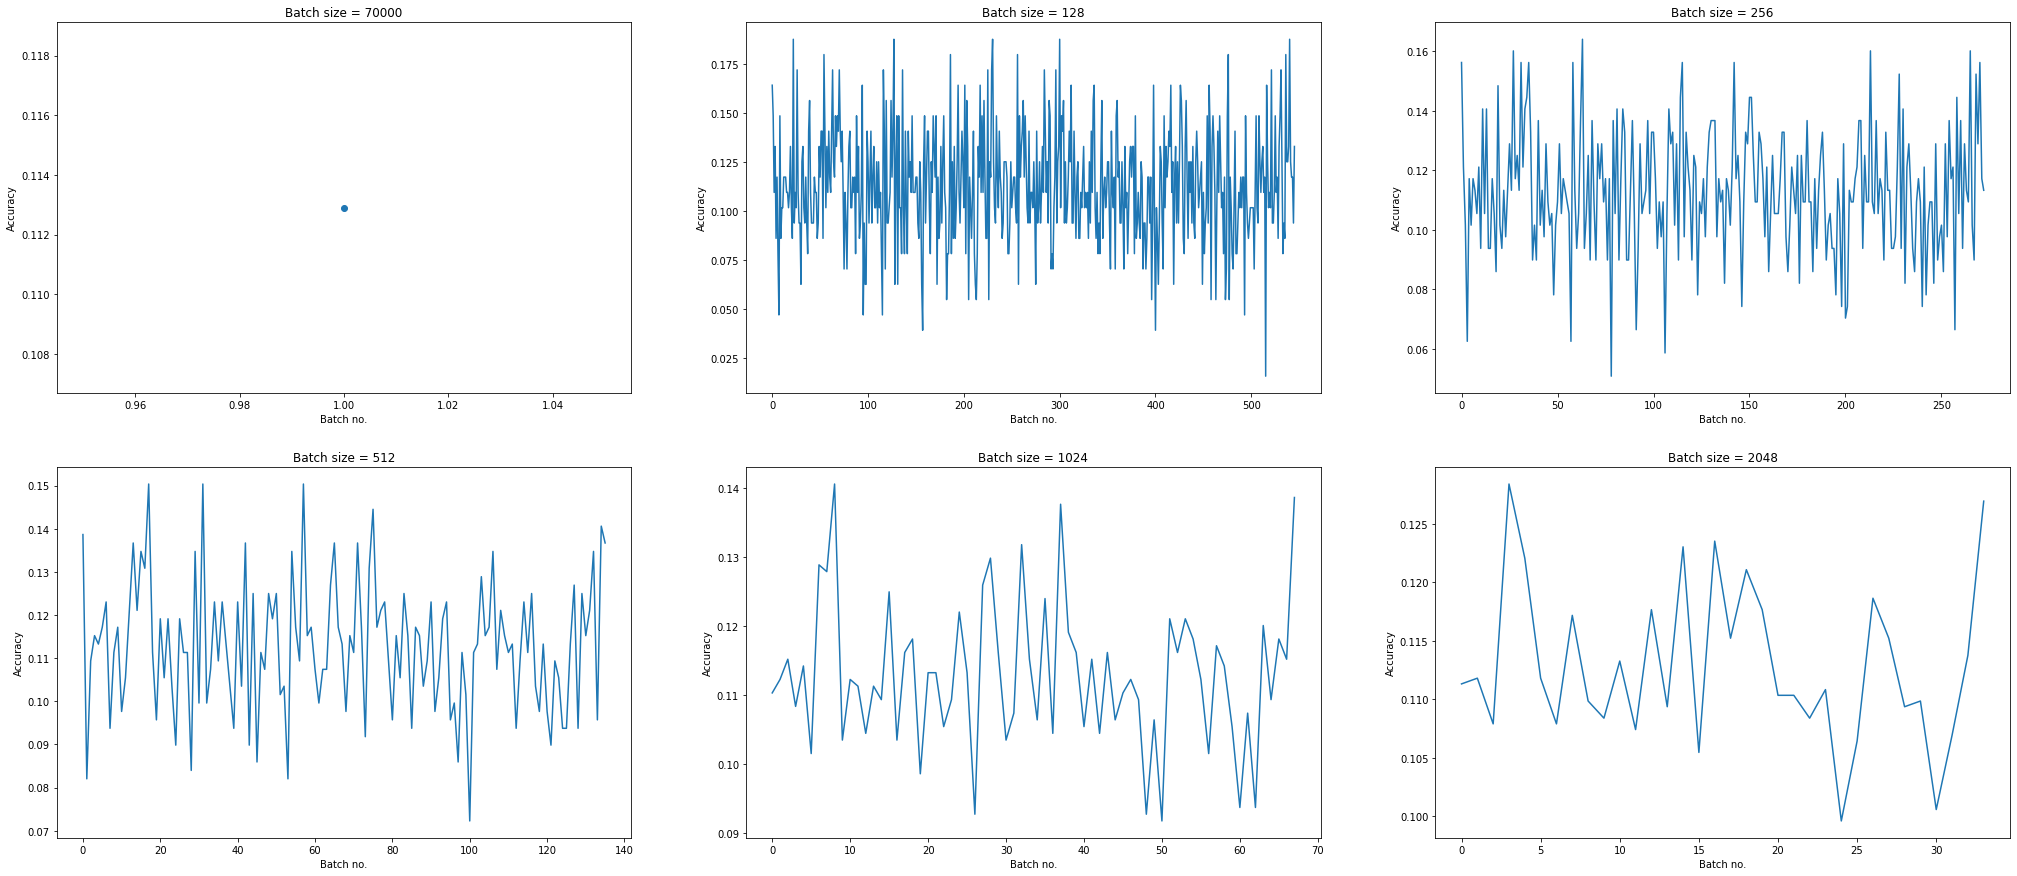

In [47]:
activations = [relu]*3 + [sigmoid]
neural_net.activations = activations

accuracies = {}
batch_sizes = [70000, 128, 256, 512, 1024, 2048]
plt.figure(figsize=(35, 15))
for i,batch_size in enumerate(batch_sizes):
    accuracies[batch_size] = go_forward(batch_size, i+1).numpy()
plt.show()

relu_accuracy = tf.reduce_mean(list(accuracies.values()))

In [48]:
print("Batch size\tAccuracy\n")
for k, v in accuracies.items():
    print(k,'\t\t',v)

Batch size	Accuracy

70000 		 0.1129
128 		 0.11288061
256 		 0.11288061
512 		 0.112879135
1024 		 0.112879135
2048 		 0.112879135


As we can see from the results above, ReLU activations improve accuracy by small amount for the neural network

# **tanh activations**

In this case, we replaced the activations of hidden layers with tanh activations. Instead of sigmoids in experiment above

### (3) Try tanh activations at each layer

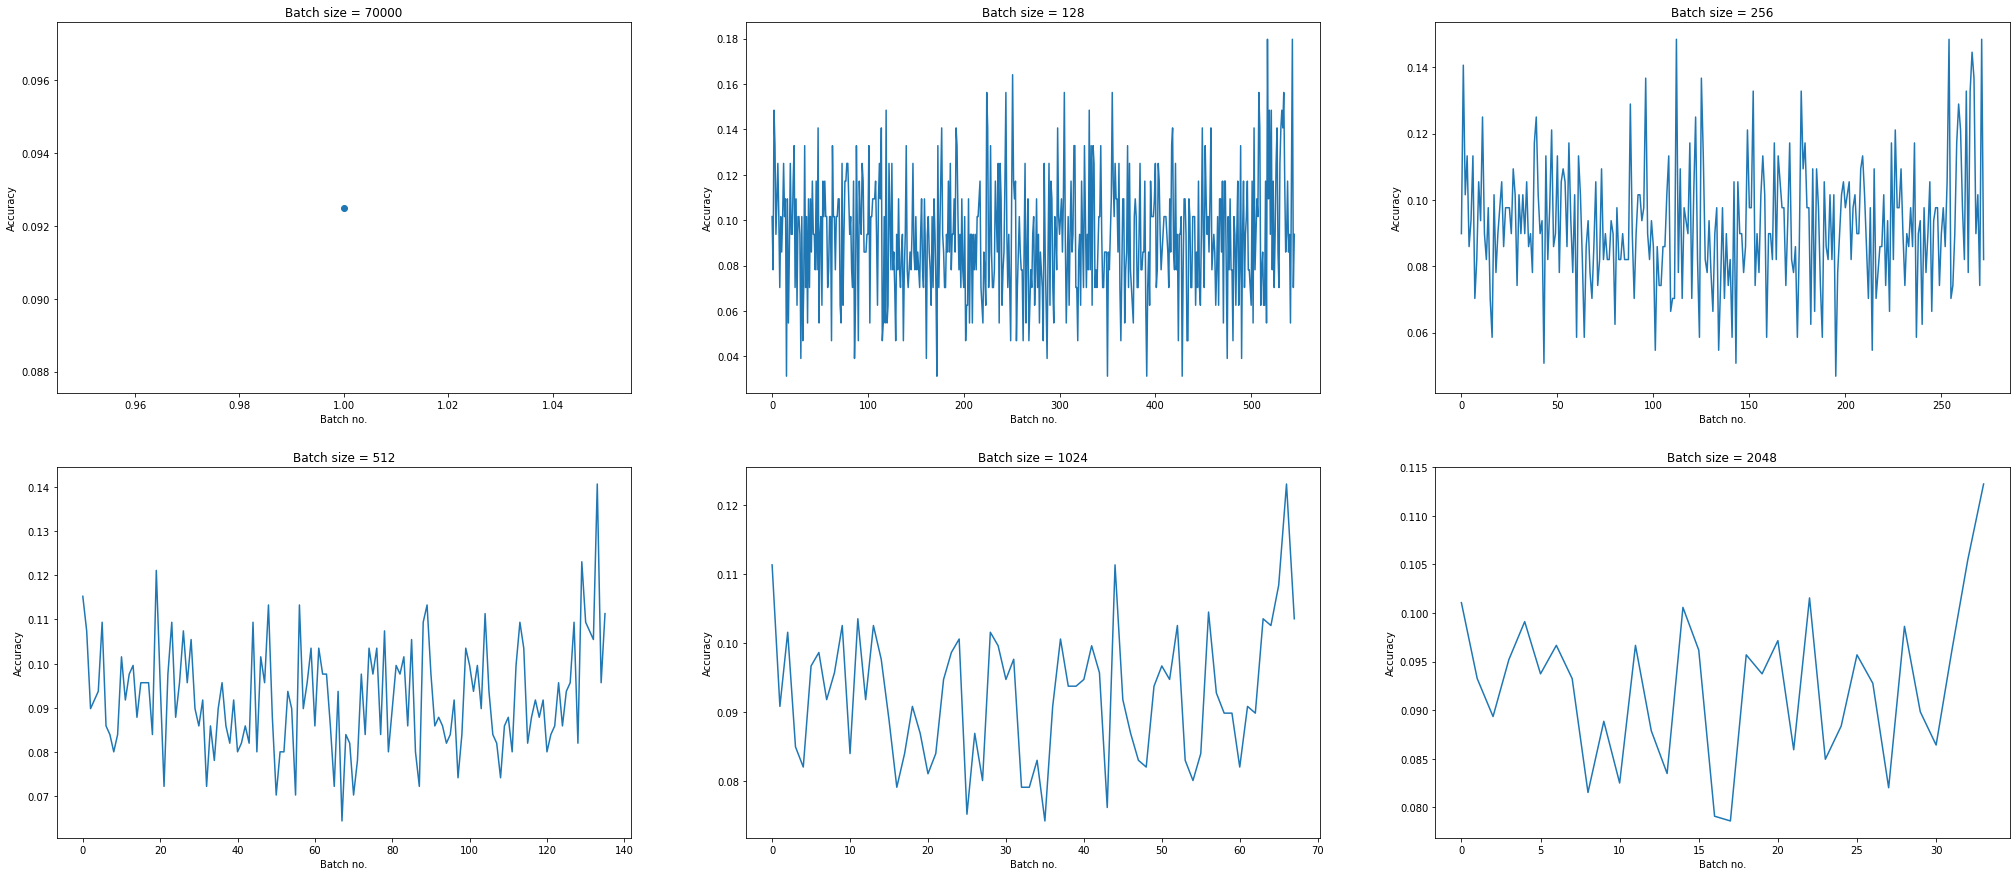

In [49]:
activations = [tanh]*4
neural_net.activations = activations

accuracies = {}
batch_sizes = [70000, 128, 256, 512, 1024, 2048]
plt.figure(figsize=(35, 15))
for i,batch_size in enumerate(batch_sizes):
    accuracies[batch_size] = go_forward(batch_size, i+1).numpy()
plt.show()

tanh_accuracy = tf.reduce_mean(list(accuracies.values()))

In [50]:
print("Batch size\tAccuracy\n")
for k, v in accuracies.items():
    print(k,'\t\t',v)

Batch size	Accuracy

70000 		 0.0925
128 		 0.09246223
256 		 0.09246223
512 		 0.092500575
1024 		 0.09251493
2048 		 0.092500575


accuracy using tanh is better compared to sigmoid, but is bit less when compared to ReLU. This can not be made general conclusion based on above results, since the weights are initialised randomely, any activation function can give the best accuracy initially. The good activation function can be determined by looking at factors like training time, validation accuracy, etc. 

**Sigmoid :** Outputs are in the range of $[0, 1]$. So, it is good option when we may want to treat outputs as probabilities, or we want the scores to be in the range of $[0, 1]$. 

**tanh :** Similar as sigmoid, but, the output scores are in the range of $[-1, 1]$.

**ReLU :** A different type of non-linearity, that squashes everything less than 0 to 0, and keeps the positive values as it is. This might be helpful in faster convergence, since the gradients are not saturated. 

# **Observation on various activation functions**

In [51]:
print("Activation \t Accuracy\n" )
print("sigmoid \t ", sigmoid_accuracy.numpy())
print("tanh \t\t ", tanh_accuracy.numpy())
print("relu \t\t ", relu_accuracy.numpy())

Activation 	 Accuracy

sigmoid 	  0.103900075
tanh 		  0.092490084
relu 		  0.11288311


# **Try different sizes of hidden layers**

## Hidden size = [h1_size, h2_size, h3_size]

### (1) Hidden size = [512, 512, 512]
### (2) Hidden size = [16, 16, 16]
### (3) Hidden size = [512, 256, 128]
### (4) Hidden size = [256, 256, 256]


In [52]:
activations = [relu]*4

def go_forward(shapes):
    neural_net = NN(shapes, activations)
    predictions = neural_net.forward(data_images)
    accuracy = cal_accuracy(predictions, data_labels)
    return accuracy

shapes = [784, 512, 512, 512, 10]
acc1 = go_forward(shapes)
shape1 = "[512, 512, 512]"

shapes = [784, 16, 16, 16, 10]
acc2 = go_forward(shapes)
shape2 = "[16, 16, 16]"

shapes = [784, 256, 256, 256, 10]
acc3 = go_forward(shapes)
shape3 = "[256, 256, 256]"

shapes = [784, 512, 256, 128, 10]
acc4 = go_forward(shapes)
shape4 = "[512, 256, 128]"


In [53]:
print("Hidden_layer_sizes \t Accuracy\n")

print(shape1 + '\t\t', acc1.numpy())
print(shape2 + '\t\t', acc2.numpy())
print(shape3 + '\t\t', acc3.numpy())
print(shape4 + '\t\t', acc4.numpy())
# print(shape5 + '\t\t', acc5.numpy())

Hidden_layer_sizes 	 Accuracy

[512, 512, 512]		 0.11437143
[16, 16, 16]		 0.1078
[256, 256, 256]		 0.114785716
[512, 256, 128]		 0.07482857


As we are not training the model, and the weights are initialised randomely, the accuracy of the model is non deterministic. So, even model with small size of hidden layer can also produce good initial accuracy. 

Generally, initially the model gives the accuracy around 10% initiallly. The reason is the random initialisation of weights. The expected accuracy initially turns out to be $(1/|C|)$, if total images in each class is almost same. $|C|$ is total number of images in class C.

# **Building confusion matrix for MNIST classification dataset**

In [54]:
y = data_labels
y_hat = neural_net.forward(data_images).numpy()


classes = int(max(y) - min(y))#find number of classes

confusion = [[sum([(y[i] == true_class) and (y_hat[i] == pred_class) 
                for i in range(len(y))])
           for pred_class in range(classes)] 
           for true_class in range(classes)]
confusion

[[505, 1291, 229, 1120, 206, 1158, 422, 1388, 399],
 [259, 1289, 942, 1860, 255, 1164, 692, 1103, 58],
 [373, 2229, 546, 607, 266, 985, 285, 1238, 271],
 [417, 1206, 936, 848, 217, 838, 196, 1529, 548],
 [686, 1515, 855, 874, 599, 665, 361, 1090, 87],
 [745, 907, 521, 845, 547, 683, 406, 1042, 289],
 [378, 2925, 252, 642, 398, 387, 255, 1326, 137],
 [406, 914, 1278, 852, 524, 912, 349, 1374, 353],
 [287, 1463, 740, 840, 555, 790, 547, 1157, 194]]

In [55]:
# Verify this confusion matrix using sklearn function 
from sklearn.metrics import confusion_matrix
test_confusion = confusion_matrix(y, y_hat)
print(test_confusion)

[[ 505 1291  229 1120  206 1158  422 1388  399  185]
 [ 259 1289  942 1860  255 1164  692 1103   58  255]
 [ 373 2229  546  607  266  985  285 1238  271  190]
 [ 417 1206  936  848  217  838  196 1529  548  406]
 [ 686 1515  855  874  599  665  361 1090   87   92]
 [ 745  907  521  845  547  683  406 1042  289  328]
 [ 378 2925  252  642  398  387  255 1326  137  176]
 [ 406  914 1278  852  524  912  349 1374  353  331]
 [ 287 1463  740  840  555  790  547 1157  194  252]
 [ 317 1516 1028  929  896  712  369  835  174  182]]


As we can see, the confusion matrix calculated is correct

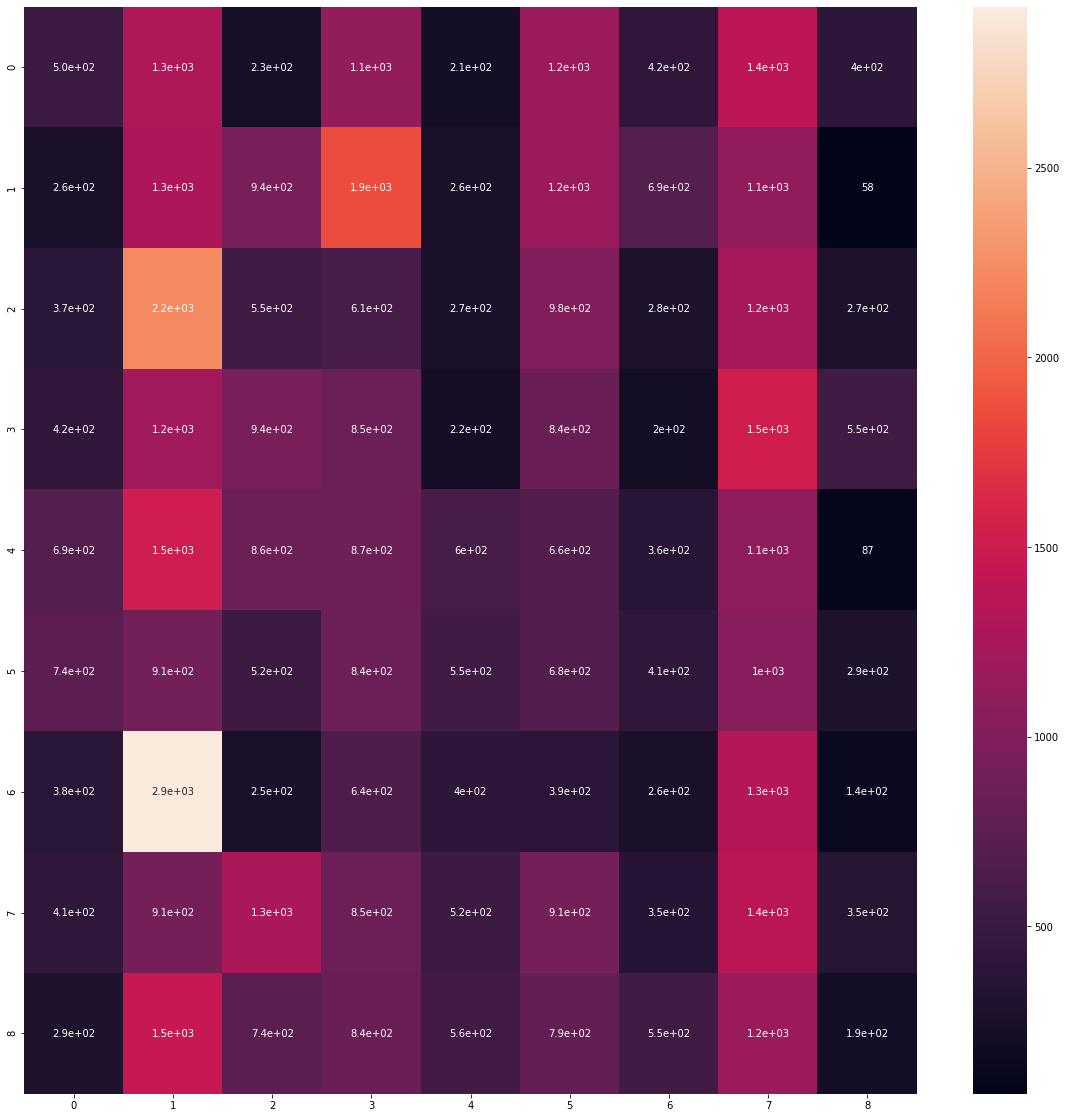

In [56]:
import seaborn

fig, ax = plt.subplots(figsize=(20,20))
seaborn.heatmap(confusion, ax=ax, annot=True)
plt.show()

# **Task- 2 Boston House Pricing Dataset**
Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

 **Variables in order**: <BR>
 **Attributes / Features** -CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT  
 **Target Variable** - MEDV <BR>

 Find the more about dataset here - http://lib.stat.cmu.edu/datasets/boston




In [57]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# **Concatenate Training and Testing Data**

In [58]:
data_train=np.concatenate((X_train, X_test))
print(data_train.shape)

data_scores=np.concatenate((y_train, y_test))
print(data_scores.shape)

(506, 13)
(506,)


In [59]:
#######################################################################################################

'''                                                                        
TODO : Define a function that would initialize weights and biases
'''

#######################################################################################################

"""
__init__ method : In the below class this method initialises the random weights and 
                  biases for the neural network. It takes in shapes and activations 
                  as parameters. 
        
        arguments : shapes, activations.

        shapes : A tensor denoting sizes of various layer. For the 5 layerd neural net, it will
                be 5 element list or tensor, in which, 1st element is the input shape, 2nd, 3rd,
                and 4th elements are sizes of hidden layers and last element is size of output 
                layer. 

                e.g. For the MNIST classification task shapes will be qual to [13, 512, 256, 128, 1]
                if the hidden layers are of sizes 512, 256 and 128 respectively.

        activations : This is list of activation functions at each layer. This will be a list of 
                    size 4, since the input layer do not have any activation. 


forward method : This method runs forward propagation on the provided input

        arguments : input

        returns predicted scores (house prices) for the input data. If the input data is provided in bathes, 
        it returns scores with shape (batch_size, ) corresponding to each input in batch

"""

#######################################################################################################

class NN():
    def __init__(self, shapes, activations):
        # Weights and biases of 1st hidden layer
        self.W1 = tf.random.normal((shapes[0], shapes[1]), mean=0.0, stddev=1.0)
        self.b1 = tf.random.normal((shapes[1],), mean=0.0, stddev=1.0)

        # Weights and biases of 2nd hidden layer
        self.W2 = tf.random.normal((shapes[1], shapes[2]), mean=0.0, stddev=1.0)
        self.b2 = tf.random.normal((shapes[2],), mean=0.0, stddev=1.0)

        # Weights and biases of 3rd hidden layer
        self.W3 = tf.random.normal((shapes[2], shapes[3]), mean=0.0, stddev=1.0)
        self.b3 = tf.random.normal((shapes[3],), mean=0.0, stddev=1.0)

        # Weights and biases output
        self.W4 = tf.random.normal((shapes[3], shapes[4]), mean=0.0, stddev=1.0)
        self.b4 = tf.random.normal((shapes[4],), mean=0.0, stddev=1.0)

        # List of activation functions to use at each layer
        self.activations = activations

    def forward(self, input):
        # hidden state 1 (corresponding to first hidden layer)
        z1 = tf.matmul(input, self.W1) + self.b1
        h1 = self.activations[0](z1)

        # hidden state 2 (corresponding to second hidden layer)
        z2 = tf.matmul(h1, self.W2) + self.b2
        h2 = self.activations[1](z2)

        # hidden state 3 (corresponding to third hidden layer )
        z3 = tf.matmul(h2, self.W3) + self.b3
        h3 = self.activations[2](z3)

        # Output 
        z4 = tf.matmul(h3, self.W4) + self.b4
        output = self.activations[3](z4)

        return output

In [60]:
'''
batch_size
hidden_layer1_size
num_epochs
input_size=784
output_size=10

'''
input_size = 13
output_size = 1
h1_size = 512
h2_size = 256
h3_size = 128

shapes = [input_size, h1_size, h2_size, h3_size, output_size]
activations = [sigmoid]*4

neural_net = NN(shapes, activations)

# **Function to calculate MSE**

In [61]:
def cal_mse(outputs, scores = data_scores):
    error = outputs - data_scores
    error_square = tf.square(error)
    mse = tf.reduce_mean(error_square)
    return mse

In [62]:
def go_forward(batch_size, idx):
    n = len(data_train)//batch_size 
    batched_data_train = data_train[:n*batch_size].reshape(n, batch_size, 13)
    batched_scores = data_scores[:n*batch_size].reshape(n, batch_size)

    mse = []
    labels = []
    for i, batch in enumerate(batched_data_train):
        labels.append("batch no = {}".format(i+1))
        batch = tf.convert_to_tensor(batch, dtype=tf.float32)
        outputs = neural_net.forward(batch)
        mse.append(cal_mse(outputs, batched_scores[i]))

        plt.subplot(1, 3, idx)
        plt.scatter(range(len(outputs)),outputs)
        plt.xlabel("Prices predicted by neural network")
        plt.ylabel("predictions")
        plt.title("Batch size = " +  str(batch_size))
    plt.legend(labels)

    return mse

#### Different colors in 2nd plot below correspond to predictions of different batches. When we set batch size = 128, we get total 3 batches, so 3 different colors. 

#### When batch size = 506 or 256, only one batch is possible, hence the predictions are for only one batch


#### **Note: Instead of ploting MSE vs batch_no, I have plotted predictions vs batch_no. The reason for this is since the input is only of size 506 data points, maximum number of batches is 3 (if min batch size = 128)(We can have more number of batches with smaller batch size though). However, I have considered minimum batch_size = 128, and so, I do not plot MSE vs batch_size, instead, I plot predictions vs batch_no to get an idea on what the initial predictions are for the house prices**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


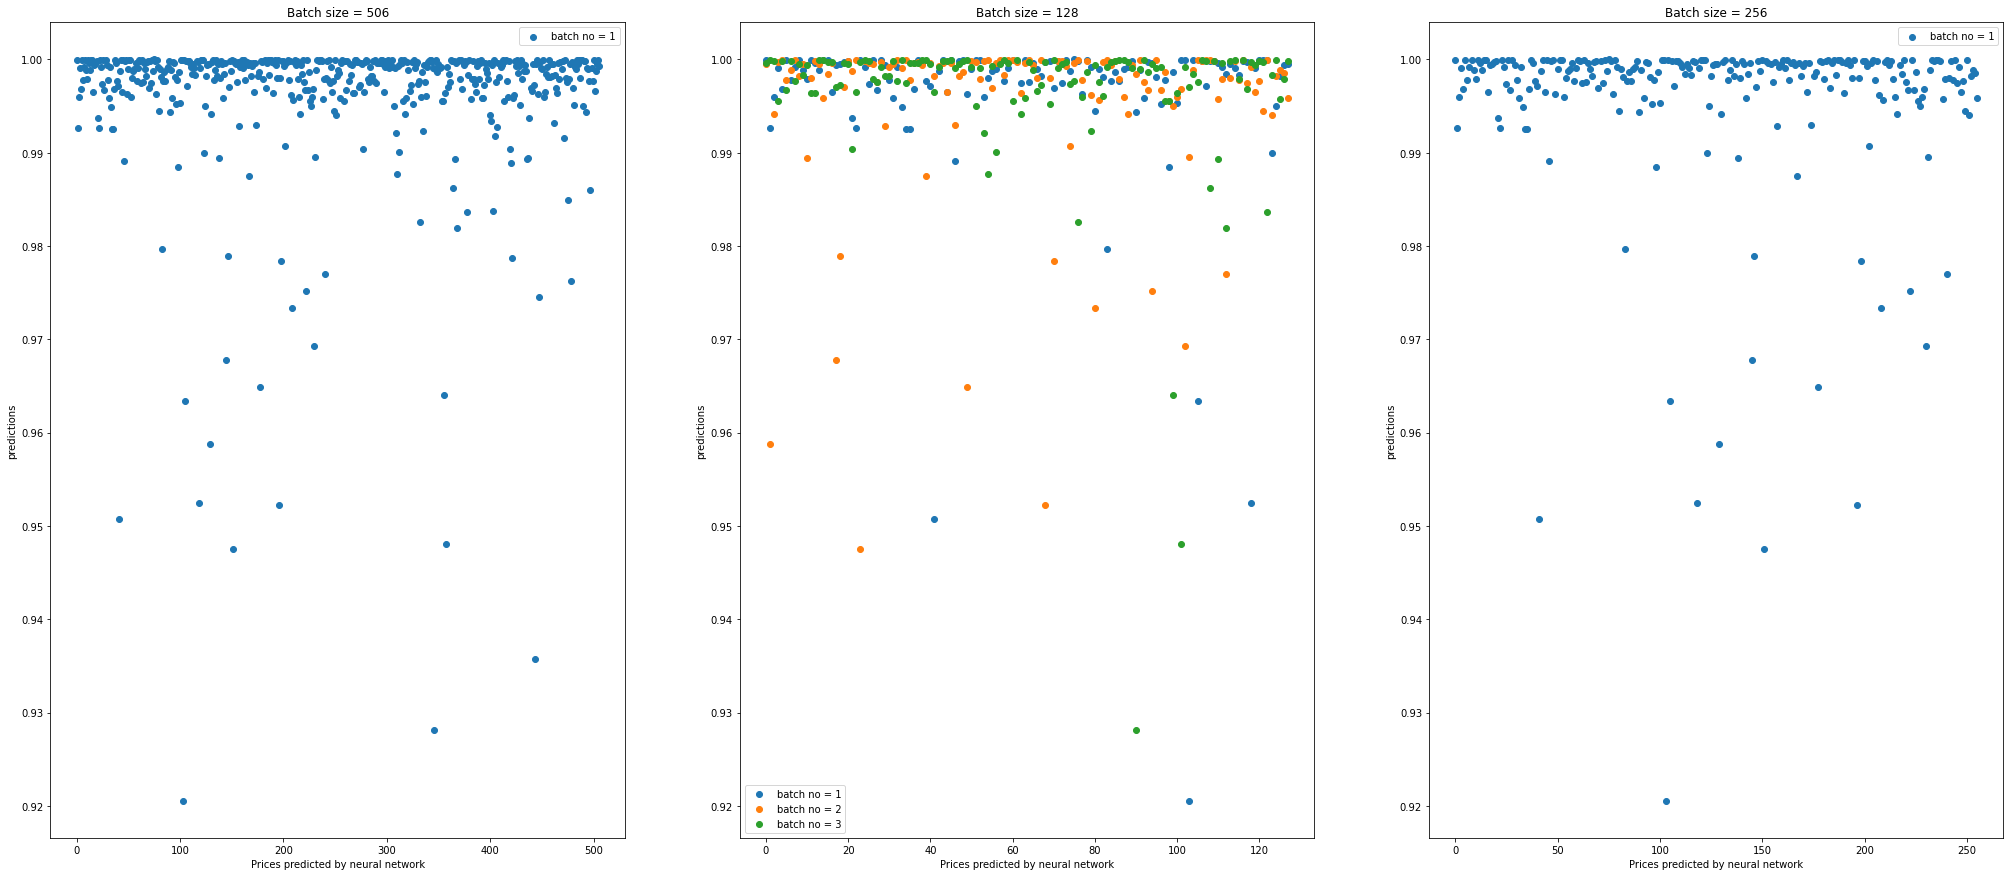

In [63]:
plt.figure(figsize=(35, 15))
batch_sizes = [506, 128, 256]
mse = {}
for i, batch_size in enumerate(batch_sizes):
    mse[batch_size] = go_forward(batch_size, i+1)
# plt.legend()
plt.show()

# **MSE for different batch size**

SInce there are very small number of batches, it is good to analyse the MSE without plots, in the below table, I print the values of MSE for different batch sizes. The values are mean values of MSE computed across all the batches. 

In [64]:
print("batch_size \t MSE\n")

for k,v in mse.items():
    print(k, '\t\t', tf.reduce_mean(v).numpy())

batch_size 	 MSE

506 		 548.2424
128 		 548.24554
256 		 548.2543


# **MSE for different activation funtions**

# **Sigmoid activations** 
#### (1) Sigmoid activation at all layers. Batch size = 506


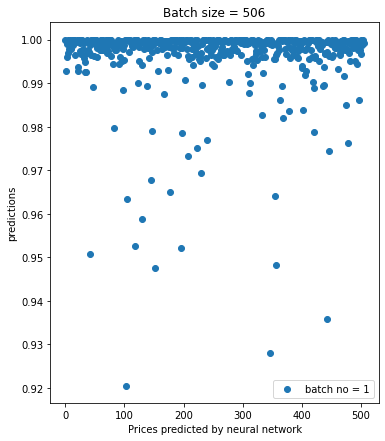


Activation = Sigmoid, MSE =  548.2424


In [65]:
neural_net.activations = [sigmoid]*4
plt.figure(figsize=(20, 7))
mse = go_forward(506, 1)
plt.show()
print("\nActivation = Sigmoid, MSE = ", tf.reduce_mean(mse).numpy())

# **tanh activations** 
#### (1) tanh activation at all layers. Batch sizes = 506

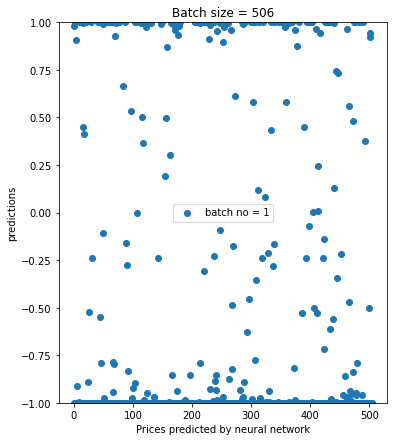

[<tf.Tensor: shape=(), dtype=float32, numpy=614.86566>]

Activation = tanh, MSE =  614.86566


In [66]:
neural_net.activations = [tanh]*4
plt.figure(figsize=(20, 7))
mse = go_forward(506, 1)
plt.ylim(-1.0, 1.0)
plt.show()
print(mse)
print("\nActivation = tanh, MSE = ", tf.reduce_mean(mse).numpy())

# **ReLU activations** 
#### (1) Relu activation at hidden layers. Sigmoid at output. 

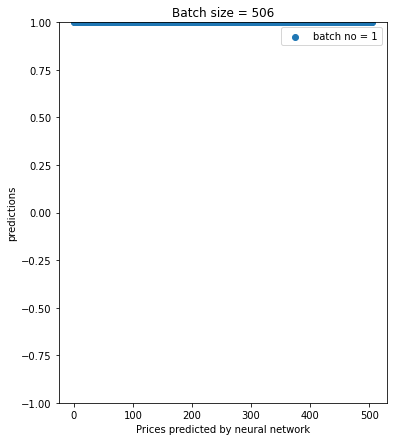

[<tf.Tensor: shape=(), dtype=float32, numpy=548.0812>]

Activation = tanh, MSE =  548.0812


In [67]:
neural_net.activations = [relu]*3 + [sigmoid]
plt.figure(figsize=(20, 7))
mse = go_forward(506, 1)
plt.ylim(-1.0, 1.0)
plt.show()
print(mse)
print("\nActivation = tanh, MSE = ", tf.reduce_mean(mse).numpy())

### As sigmoid saturates to 0 for very small, and 1 for very large values, it seems that the input features are large enough to make the output of sigmoid to either saturate to 0 or 1. 

### In the same manner, for tanh, we have two values 1 and -1, as predicted price by our network

### For ReLU, since it keeps positive values as it is, and thresholds negatives to 0, we can expect that after 5 layers, the inputs to the last layer would be large and positive (because 5 successive ReLU layers). As a result, input to sigmoid at output will be large positive, giving 1 as the output predicted price. If oppositve is the case, then we might get too much negative at the input of sigmoid at last layer, giving 0 as the predicted probability.  